In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sn
from sklearn.model_selection import train_test_split

In [71]:
df = pd.read_csv("CARSALESDATA.csv")
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [72]:
missing_values = df.isnull().sum()
print(missing_values)

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


In [74]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [73]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate columns: {duplicates}")

Number of duplicate columns: 0


In [75]:
# Define a function to apply Label Encoding to the specified columns
def apply_label_encoding(df, columns):
    encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le
    return df, encoders
# encoders value to look like this:
# {
#     'Transmission': {0: 'Auto', 1:'Manual'},
#     'Dealer': [1:..., 2:...]
# }

def get_bins(df, column, num_bins):
    # Calculate the quantiles
    quantiles = np.linspace(0, 1, num_bins+1)

    # Get the bin edges
    bins = df[column].quantile(quantiles).values

    return bins

def apply_binning(df, column, bins, labels=None):
    df[column + '_bin'] = pd.cut(df[column], bins=bins, labels=labels, duplicates='drop')
    return df

In [76]:
df = pd.read_csv("CARSALESDATA.csv")
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [77]:
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [78]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [79]:
df.head(3)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville


In [80]:
# Get bins for 'Annual Income'
income_bins = get_bins(df, 'Annual Income', 20)

# Apply binning to 'Annual Income'
df = apply_binning(df, 'Annual Income', income_bins)
df['Annual Income_bin'].value_counts()

Annual Income_bin
(10080.0, 13500.0]         5273
(735000.0, 800000.0]       1292
(1175750.0, 1300000.0]     1264
(556000.0, 620000.0]       1234
(675000.0, 735000.0]       1201
(1690000.0, 2100000.0]     1199
(482000.0, 556000.0]       1195
(386000.0, 482000.0]       1194
(941000.0, 1040000.0]      1193
(1040000.0, 1175750.0]     1193
(2100000.0, 11200000.0]    1187
(865000.0, 941000.0]       1167
(1450000.0, 1690000.0]     1166
(1300000.0, 1450000.0]     1161
(620000.0, 675000.0]       1157
(800000.0, 865000.0]       1124
(13500.0, 386000.0]         705
Name: count, dtype: int64

In [81]:
# Get bins for 'Price ($)'
price_bins = get_bins(df, 'Price ($)', 20)

# Apply binning to 'Price ($)'
df = apply_binning(df, 'Price ($)', price_bins)
df['Price ($)_bin'].value_counts()

Price ($)_bin
(14000.0, 16000.0]    1409
(21001.0, 22000.0]    1407
(26000.0, 28000.0]    1336
(12000.0, 14000.0]    1301
(23000.0, 25000.0]    1290
(20001.0, 21001.0]    1286
(19000.0, 20001.0]    1269
(1200.0, 12000.0]     1267
(39001.0, 43000.0]    1265
(28000.0, 31000.0]    1254
(46001.0, 61000.0]    1224
(34000.0, 39001.0]    1205
(17000.0, 18001.0]    1163
(61000.0, 85800.0]    1142
(43000.0, 46001.0]    1130
(18001.0, 19000.0]    1110
(25000.0, 26000.0]    1016
(16000.0, 17000.0]     993
(31000.0, 34000.0]     977
(22000.0, 23000.0]     861
Name: count, dtype: int64

In [82]:
## Make new columns

# Extract Year, Month, and Day of the Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek
# Monday =0, Sunday =6

df['Price_Income_Ratio'] = df['Price ($)'] / df['Annual Income']

df.insert(7, 'Company-Model', df['Company']+'-'+df['Model'])
del df['Company']
del df['Model']

In [83]:
## Encode columns

# Specify the columns to be encoded
columns_to_encode = ['Gender', 'Dealer_Name', 'Company-Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']

# Apply Label Encoding to the specified columns
df, encoders = apply_label_encoding(df, columns_to_encode)
# way to decode:
# original_values = encoders['Gender'].inverse_transform(df['Gender'])

In [84]:
pd.set_option('display.max_columns',30)
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company-Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Annual Income_bin,Price ($)_bin,Year,Month,Day_of_Week,Price_Income_Ratio
0,C_CND_000001,2022-01-02,Geraldine,1,13500,0,48,0,0,0,26000,06457-3834,3,8264678,4,"(10080.0, 13500.0]","(25000.0, 26000.0]",2022,1,6,1.925926
1,C_CND_000002,2022-01-02,Gia,1,1480000,1,37,0,0,0,19000,60504-7114,3,6848189,0,"(1450000.0, 1690000.0]","(18001.0, 19000.0]",2022,1,6,0.012838
2,C_CND_000003,2022-01-02,Gianna,1,1035000,2,15,1,1,2,31500,38701-8047,2,7298798,2,"(941000.0, 1040000.0]","(31000.0, 34000.0]",2022,1,6,0.030435
3,C_CND_000004,2022-01-02,Giselle,1,13500,4,137,1,1,1,14000,99301-3882,3,6257557,5,"(10080.0, 13500.0]","(12000.0, 14000.0]",2022,1,6,1.037037
4,C_CND_000005,2022-01-02,Grace,1,1465000,3,2,0,0,2,24500,53546-9427,1,7081483,3,"(1450000.0, 1690000.0]","(23000.0, 25000.0]",2022,1,6,0.016724


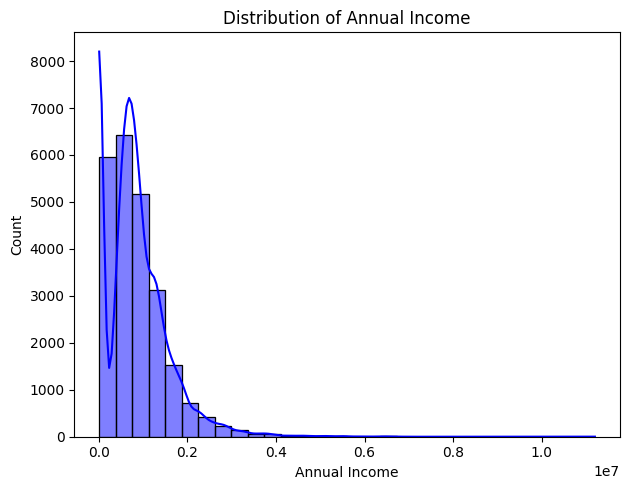

In [85]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sn.histplot(df['Annual Income'], bins=30, kde=True, color='blue')
plt.title('Distribution of Annual Income')
plt.tight_layout()
plt.show()

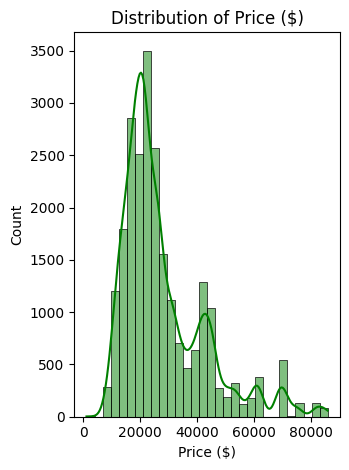

In [86]:
plt.subplot(1, 2, 2)
sn.histplot(df['Price ($)'], bins=30, kde=True, color='green')
plt.title('Distribution of Price ($)')
plt.tight_layout()
plt.show()

<ipython-input-87-e6f8dd64e3e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='Gender', data=df, palette='Set2')


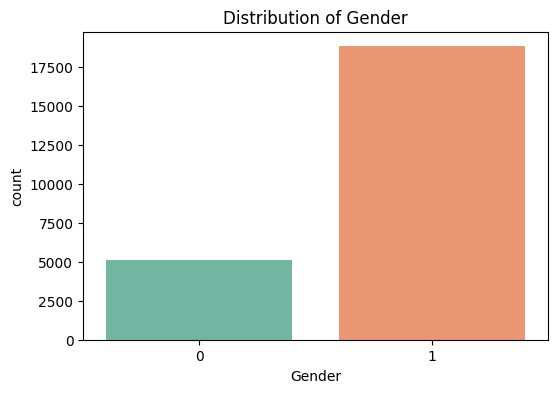

In [87]:
plt.figure(figsize=(6, 4))
sn.countplot(x='Gender', data=df, palette='Set2')
plt.title('Distribution of Gender')
plt.show()

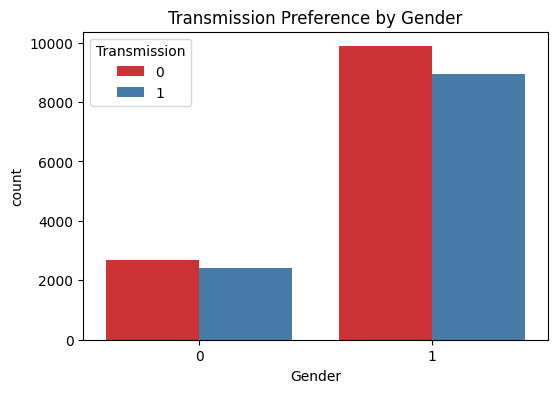

In [88]:
plt.figure(figsize=(6, 4))
sn.countplot(x='Gender', hue='Transmission', data=df, palette='Set1')
plt.title('Transmission Preference by Gender')
plt.show()

In [89]:
## Feature selection (select columns which go into training, Based on the ML algorithm)
features = df[['Gender', 'Annual Income', 'Dealer_Name', 'Company-Model', 'Engine', 'Price ($)']]
target = df['Transmission']


In [90]:
# Increase max_iter
log_reg = LogisticRegression(max_iter=23000)

# Split the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=43)

# Train the Logistic Regression model
log_reg = log_reg.fit(features_train, target_train)

# Predict the response for the test dataset
target_pred = log_reg.predict(features_test)

In [91]:
# Model Accuracy
print("Accuracy:", metrics.accuracy_score(target_test, target_pred))

Accuracy: 0.5294855708908407


In [92]:
cm = confusion_matrix(target_test, target_pred)

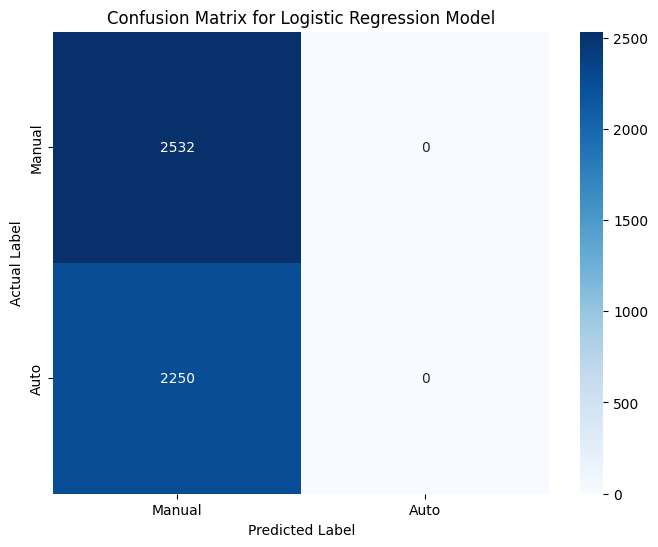

In [93]:
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Manual", "Auto"], yticklabels=["Manual", "Auto"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [94]:
coefficients = log_reg.coef_[0]
feature_names = ['Gender', 'Annual Income', 'Dealer_Name', 'Company-Model', 'Engine', 'Price ($)']

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sorting the DataFrame by the coefficients to understand their influence
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Display the DataFrame
print(coef_df)



         Feature   Coefficient
4         Engine  1.878355e-09
0         Gender -3.853691e-11
2    Dealer_Name -9.931076e-10
3  Company-Model -8.303077e-09
1  Annual Income -3.863450e-08
5      Price ($) -2.247335e-06


In [95]:
pd.set_option('display.max_columns',30)
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company-Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Annual Income_bin,Price ($)_bin,Year,Month,Day_of_Week,Price_Income_Ratio
0,C_CND_000001,2022-01-02,Geraldine,1,13500,0,48,0,0,0,26000,06457-3834,3,8264678,4,"(10080.0, 13500.0]","(25000.0, 26000.0]",2022,1,6,1.925926
1,C_CND_000002,2022-01-02,Gia,1,1480000,1,37,0,0,0,19000,60504-7114,3,6848189,0,"(1450000.0, 1690000.0]","(18001.0, 19000.0]",2022,1,6,0.012838
2,C_CND_000003,2022-01-02,Gianna,1,1035000,2,15,1,1,2,31500,38701-8047,2,7298798,2,"(941000.0, 1040000.0]","(31000.0, 34000.0]",2022,1,6,0.030435
3,C_CND_000004,2022-01-02,Giselle,1,13500,4,137,1,1,1,14000,99301-3882,3,6257557,5,"(10080.0, 13500.0]","(12000.0, 14000.0]",2022,1,6,1.037037
4,C_CND_000005,2022-01-02,Grace,1,1465000,3,2,0,0,2,24500,53546-9427,1,7081483,3,"(1450000.0, 1690000.0]","(23000.0, 25000.0]",2022,1,6,0.016724


In [101]:
## Feature selection (select columns which go into training, Based on the ML algorithm)
features = df[[ 'Annual Income', 'Company-Model', 'Engine','Price ($)', 'Price_Income_Ratio']]
target = df['Transmission']


In [102]:
# Assuming 'features' is your DataFrame containing all the features and 'target' is the Series containing the target variable
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)  # 70% training and 30% testing

In [104]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(features_train, target_train)

# Predict the response for test dataset
target_pred = clf.predict(features_test)

In [105]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(target_test, target_pred))


Accuracy: 1.0


In [106]:
confusion_mat = confusion_matrix(target_test, target_pred)

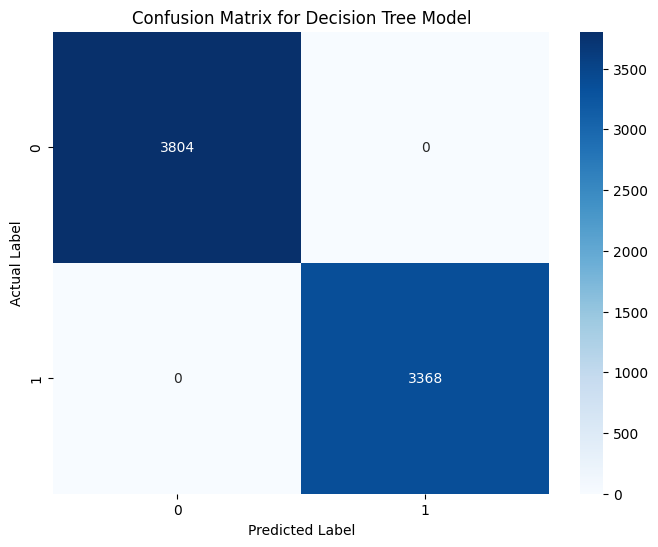

In [107]:
plt.figure(figsize=(8, 6))
sn.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [108]:
importances_df = pd.DataFrame({
    'Feature': features_train.columns,
    'Importance': clf.feature_importances_
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)

              Feature  Importance
2              Engine         1.0
0       Annual Income         0.0
1       Company-Model         0.0
3           Price ($)         0.0
4  Price_Income_Ratio         0.0


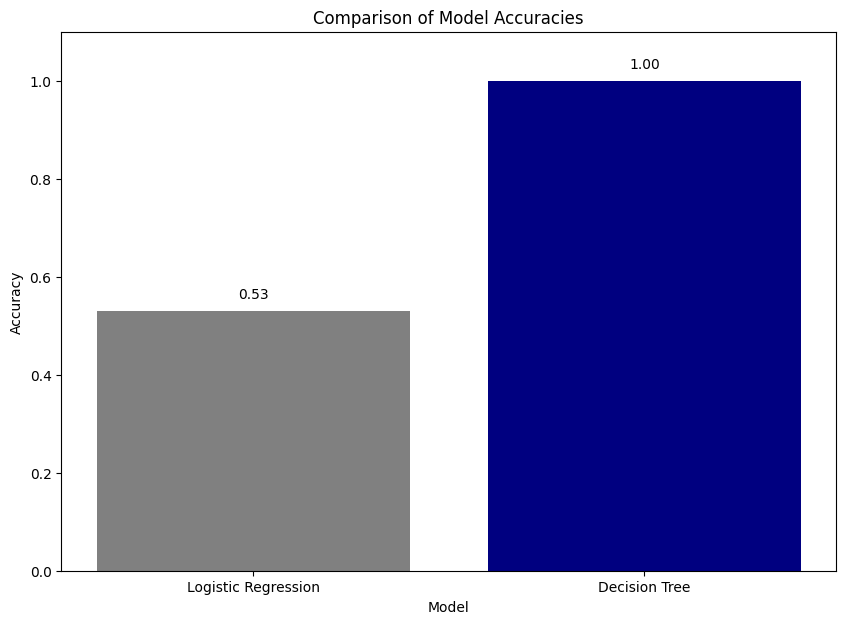

In [109]:
accuracy_logistic_regression = 0.5294855708908407
accuracy_decision_tree = 1.0

# Plotting the accuracies
plt.figure(figsize=(10, 7))
models = ['Logistic Regression', 'Decision Tree']
accuracies = [accuracy_logistic_regression, accuracy_decision_tree]
plt.bar(models, accuracies, color=['grey', 'navy'])

# Adding titles and labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # Extend y-axis to fit the 100% accuracy of decision tree
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, "{:.2f}".format(v), ha='center', va='bottom')

plt.show()

In [110]:
log_reg = LogisticRegression(max_iter=23000)
log_reg.fit(features_train, target_train)

LogisticRegression(max_iter=23000)

In [111]:
# Predict probabilities for Logistic Regression
probabilities_lr = log_reg.predict_proba(features_test)[:, 1]

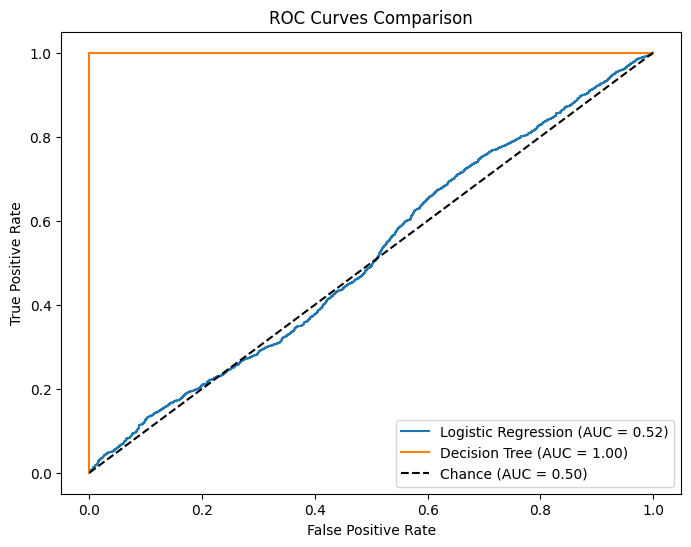

In [112]:
# Predict probabilities for Decision Tree
probabilities_dt = clf.predict_proba(features_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(target_test, probabilities_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(target_test, probabilities_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()